In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d prasad22/healthcare-dataset

Dataset URL: https://www.kaggle.com/datasets/prasad22/healthcare-dataset
License(s): CC0-1.0
 69% 2.00M/2.91M [00:00<00:00, 19.4MB/s]
100% 2.91M/2.91M [00:00<00:00, 22.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/healthcare-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [5]:
medical_data = pd.read_csv('healthcare_dataset.csv')
medical_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
medical_data.shape

(55500, 15)

In [7]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
medical_data.value_counts('Test Results')

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [9]:
for columns in medical_data.columns:
  print(columns)

Name
Age
Gender
Blood Type
Medical Condition
Date of Admission
Doctor
Hospital
Insurance Provider
Billing Amount
Room Number
Admission Type
Discharge Date
Medication
Test Results


In [10]:
# Select the necessary columns
columns = ['Age', 'Gender','Blood Type', 'Medical Condition','Test Results', 'Medication']
medical_data = medical_data[columns]

In [11]:
# Handle missing values if any (simple example with forward fill)
medical_data.isna().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Test Results         0
Medication           0
dtype: int64

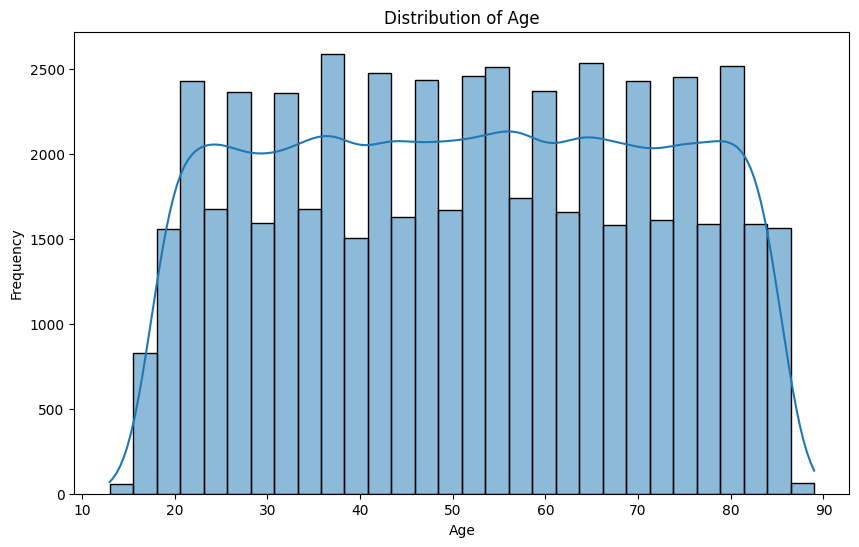

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(medical_data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-93b4cdb855fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=medical_data,palette = "Set1")


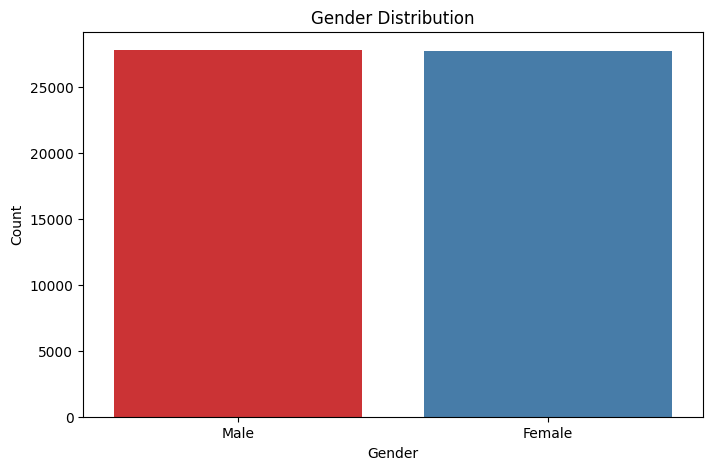

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=medical_data,palette = "Set1")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-14-e87985c7e83b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Blood Type', data=medical_data,palette = "Set2")


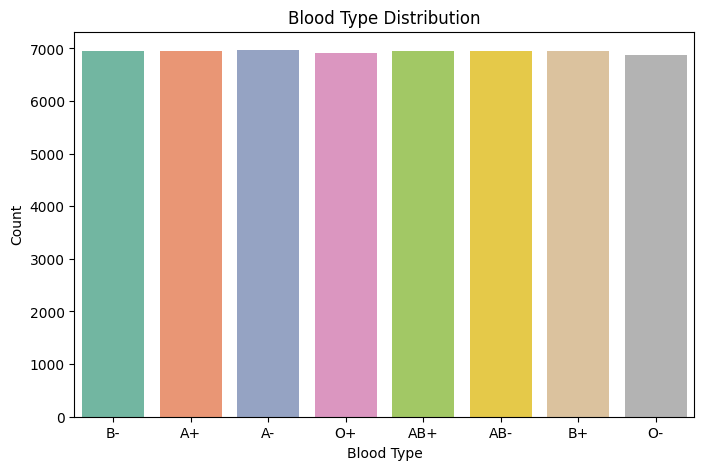

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Blood Type', data=medical_data,palette = "Set2")
plt.title('Blood Type Distribution')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()

<ipython-input-15-cdb48c7f9938>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medical Condition', data=medical_data, order=medical_data['Medical Condition'].value_counts().index,palette = "Set1")


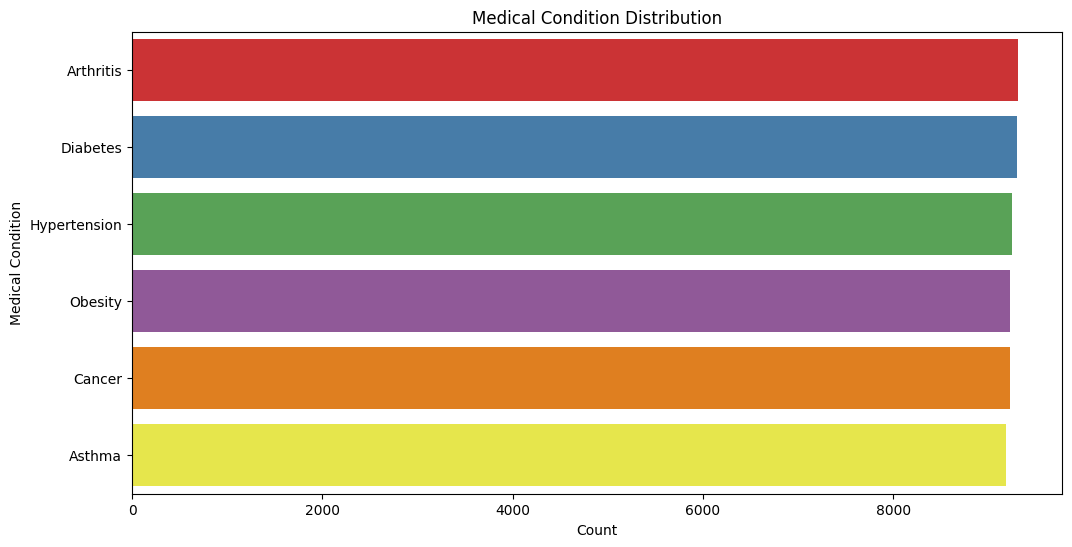

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Medical Condition', data=medical_data, order=medical_data['Medical Condition'].value_counts().index,palette = "Set1")
plt.title('Medical Condition Distribution')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

<ipython-input-16-79d9295a55bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Test Results', data=medical_data,palette = "Set2")


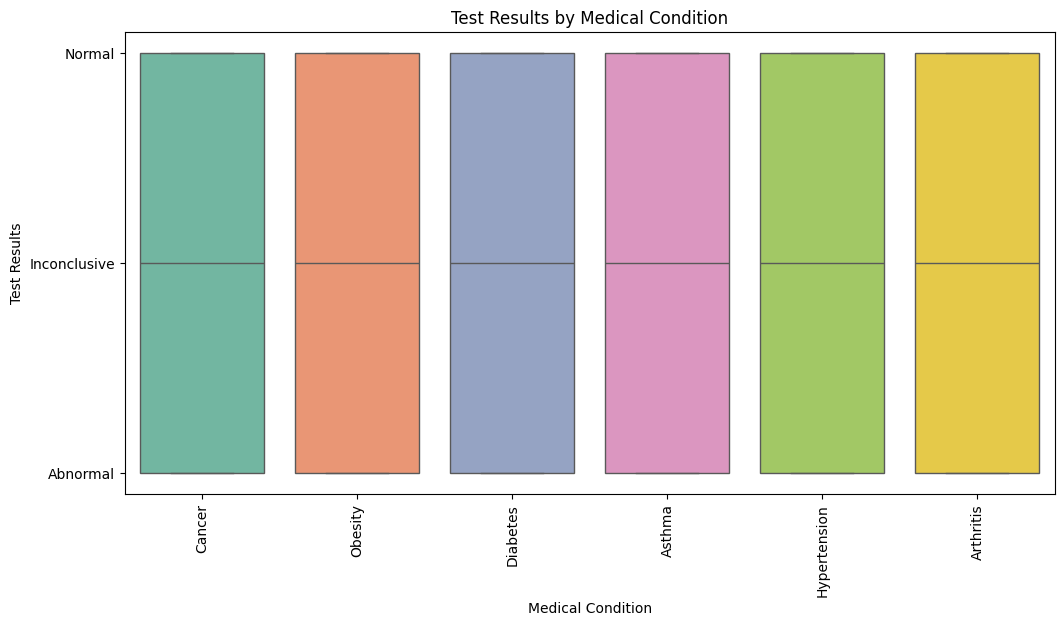

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medical Condition', y='Test Results', data=medical_data,palette = "Set2")
plt.title('Test Results by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Test Results')
plt.xticks(rotation=90)
plt.show()

<ipython-input-17-f3ad1034a373>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Age', data=medical_data,palette = 'Set2')


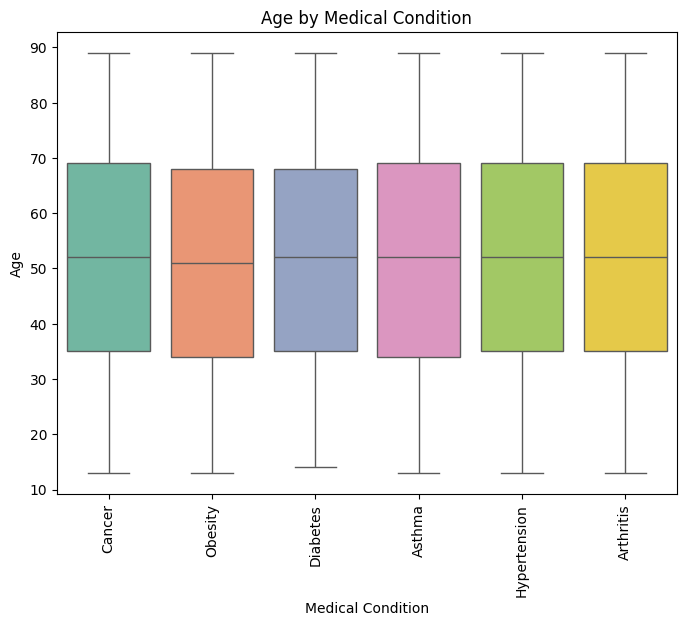

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Medical Condition', y='Age', data=medical_data,palette = 'Set2')
plt.title('Age by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

In [18]:
medical_data.head()

,Age,Gender,Blood Type,Medical Condition,Test Results,Medication
0,30,Male,B-,Cancer,Normal,Paracetamol
1,62,Male,A+,Obesity,Inconclusive,Ibuprofen
2,76,Female,A-,Obesity,Normal,Aspirin
3,28,Female,O+,Diabetes,Abnormal,Ibuprofen
4,43,Female,AB+,Cancer,Abnormal,Penicillin


In [19]:
medical_data.value_counts('Medical Condition')

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [20]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                55500 non-null  int64 
 1   Gender             55500 non-null  object
 2   Blood Type         55500 non-null  object
 3   Medical Condition  55500 non-null  object
 4   Test Results       55500 non-null  object
 5   Medication         55500 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


In [21]:
label_columns = ['Gender','Blood Type','Medical Condition','Test Results', 'Medication']
label_encoder = LabelEncoder()
for column in label_columns:
    medical_data[column] = label_encoder.fit_transform(medical_data[column])

In [22]:
medical_data

,Age,Gender,Blood Type,Medical Condition,Test Results,Medication
0,30,1,5,2,2,3
1,62,1,0,5,1,1
2,76,0,1,5,2,0
3,28,0,6,3,0,1
4,43,0,2,2,0,4
...,...,...,...,...,...,...
55495,42,0,6,1,0,4
55496,61,0,3,5,2,0
55497,38,0,4,4,0,1
55498,43,1,7,0,0,1


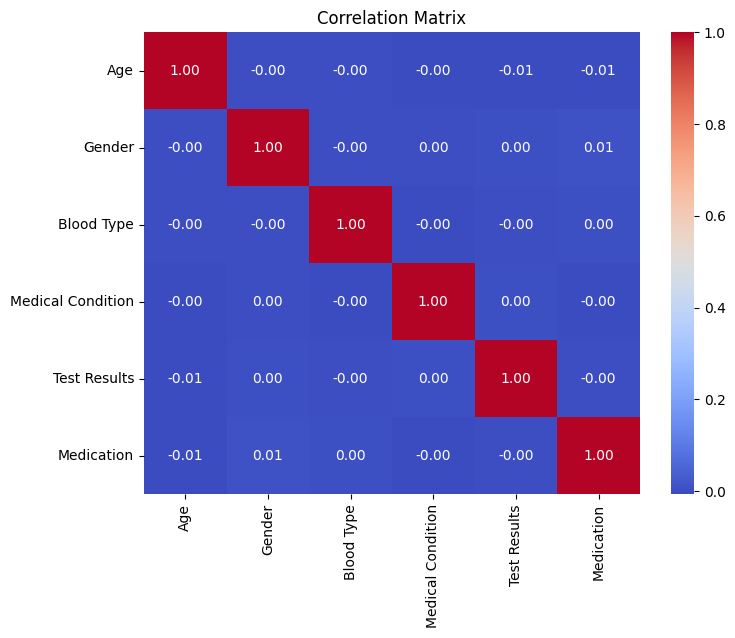

In [23]:
plt.figure(figsize=(8, 6))
corr = medical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

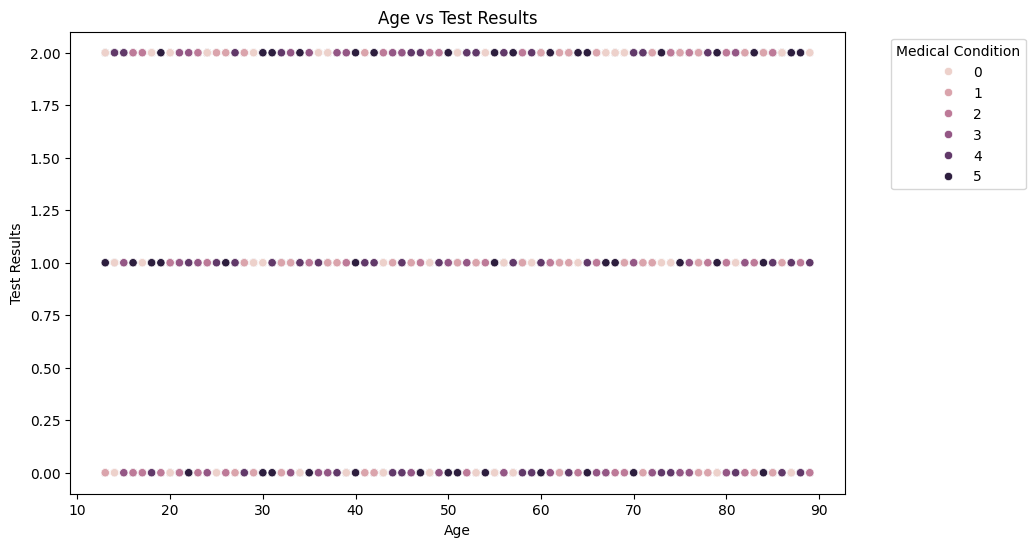

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Test Results', hue='Medical Condition', data=medical_data)
plt.title('Age vs Test Results')
plt.xlabel('Age')
plt.ylabel('Test Results')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [25]:
X = medical_data.drop('Medical Condition', axis=1)
y = medical_data['Medical Condition']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(55500, 5) (44400, 5) (11100, 5)
(55500,) (44400,) (11100,)


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [30]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
model_names = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    model_names.append(name)

    print(f"Accuracy of {name}: {accuracy}")
    print(f"Precision of {name}: {precision}")
    print(f"Recall of {name}: {recall}")
    print(f"F1-Score of {name}: {f1}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Training Decision Tree...
Accuracy of Decision Tree: 0.17432432432432432
Precision of Decision Tree: 0.1738477723137063
Recall of Decision Tree: 0.17432432432432432
F1-Score of Decision Tree: 0.16888170305936023
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.27      0.21      1915
           1       0.17      0.23      0.20      1847
           2       0.19      0.18      0.18      1871
           3       0.17      0.15      0.16      1822
           4       0.17      0.12      0.14      1788
           5       0.17      0.09      0.12      1857

    accuracy                           0.17     11100
   macro avg       0.17      0.17      0.17     11100
weighted avg       0.17      0.17      0.17     11100

Confusion Matrix:
[[520 401 297 281 215 201]
 [511 422 314 250 181 169]
 [487 420 341 243 206 174]
 [493 372 303 267 208 179]
 [505 385 297 233 211 157]
 [518 417 283 258 207 174]]
-----------------------------------------

In [31]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

print(results_df)

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.174324   0.173848  0.174324  0.168882
1  Random Forest  0.171081   0.171245  0.171081  0.171041
2            SVM  0.168649   0.167814  0.168649  0.161196
